# MNIST DIGIT READER

### First we have to import pur libraries and load our training data.

### 8000 images seemed to be the best compromise in time and testing to use for results.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [13]:
labeled_images = pd.read_csv('mnisttrain')
images = labeled_images.iloc[0:8000,1:]
labels = labeled_images.iloc[0:8000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

### Next, to view an image in 2D we have to reshape the array to 28x28.

### This is using gray scale.


Text(0.5,1,u'1')

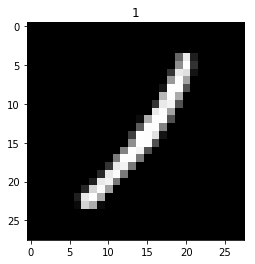

In [14]:
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([ 713.,    6.,    4.,    6.,    6.,    5.,    7.,    1.,    4.,   32.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

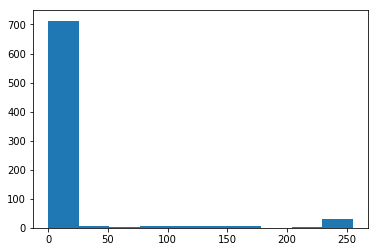

In [15]:
plt.hist(train_images.iloc[i])

### Using a Support Vector MAchine as our classifier we train our grayscale data.

### It gets about 11% accuracy.

In [16]:
classifier = svm.SVC()
classifier.fit(train_images, train_labels.values.ravel())
classifier.score(test_images,test_labels)

0.11125

### We can simplify our data even more than grayscale and become purely black and white; binary

C:\Users\krist\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\krist\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,u'label    1\nName: 7360, dtype: int64')

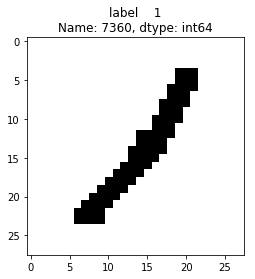

In [17]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([ 707.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   77.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

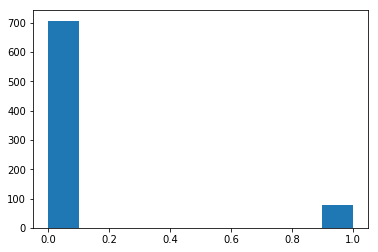

In [18]:
plt.hist(train_images.iloc[i])

### I retrained the data, this time getting about 91% accuracy.

In [19]:
classifier = svm.SVC()
classifier.fit(train_images, train_labels.values.ravel())
classifier.score(test_images,test_labels)

0.91562500000000002

### Kaggle Requires 28,000 rows in the CSV file so we predict the unlabeled data from test

In [20]:
test_data=pd.read_csv('mnisttest')
test_data[test_data>0]=1
results=classfier.predict(test_data[0:28000])

In [21]:
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

### Load the results to a .csv file and upload to Kaggle!

In [22]:
df = pd.DataFrame(results)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results.csv', header=True)